In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
df1= pd.read_csv('FinalData\covid19.csv')
df2= pd.read_csv('FinalData\population.csv')
df1.drop(columns='Unnamed: 0', inplace = True)
indexConditions= df1[(df1['confirmed'] == 0)&(df1['deaths'] ==0)&(df1['recoveries'] ==0) ].index
df1.drop(indexConditions,inplace= True)
copy_df1= df1
df1GroupByDate= df1.groupby('date').agg({'confirmed': np.sum,'deaths': np.sum , 'recoveries': np.sum}).sort_values('confirmed', ascending=True)
df1GroupByDate.reset_index(inplace=True,drop= False)
newcases = [0]
newdeath=[0]
newrecoveries=[0]
for i in range(len(df1GroupByDate['confirmed'])-1):
    newcases.append(df1GroupByDate.loc[i+1, 'confirmed']-df1GroupByDate.loc[i, 'confirmed'])
    newdeath.append(df1GroupByDate.loc[i+1, 'deaths']-df1GroupByDate.loc[i, 'deaths'])
    newrecoveries.append(df1GroupByDate.loc[i+1, 'recoveries']-df1GroupByDate.loc[i, 'recoveries'])
df1GroupByDate['new cases']= newcases
df1GroupByDate['new death']= newdeath
df1GroupByDate['new recoveries']= newrecoveries
df1GroupByDate

,date,confirmed,deaths,recoveries,new cases,new death,new recoveries
0,1/22/20,555,17,28,0,0,0
1,1/23/20,654,18,30,99,1,2
2,1/24/20,941,26,36,287,8,6
3,1/25/20,1434,42,39,493,16,3
4,1/26/20,2117,56,52,683,14,13
...,...,...,...,...,...,...,...
142,6/12/20,7544665,417655,3561378,129100,4265,78813
143,6/13/20,7678838,421864,3646502,134173,4209,85124
144,6/14/20,7812022,425173,3716463,133184,3309,69961
145,6/15/20,7933698,428671,3795872,121676,3498,79409


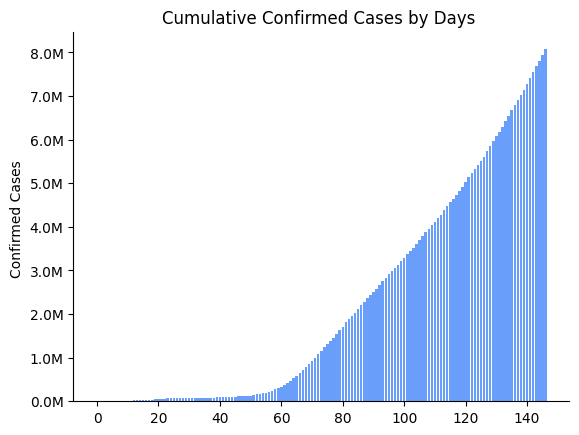

In [3]:
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'{x * 1e-6:1.1f}M'
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.bar(np.arange(len(df1GroupByDate['date'])), df1GroupByDate['confirmed'],color='#699EFA')
ax.set_ylabel('Confirmed Cases ')
ax.set_title('Cumulative Confirmed Cases by Days ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


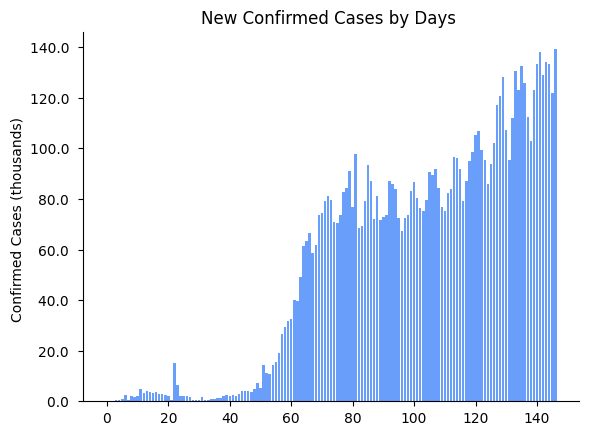

In [4]:
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'{x * 1e-3:1.1f} '
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.bar(np.arange(len(df1GroupByDate['date'])), df1GroupByDate['new cases'],color='#699EFA')
ax.set_ylabel('Confirmed Cases (thousands) ')
ax.set_title('New Confirmed Cases by Days ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


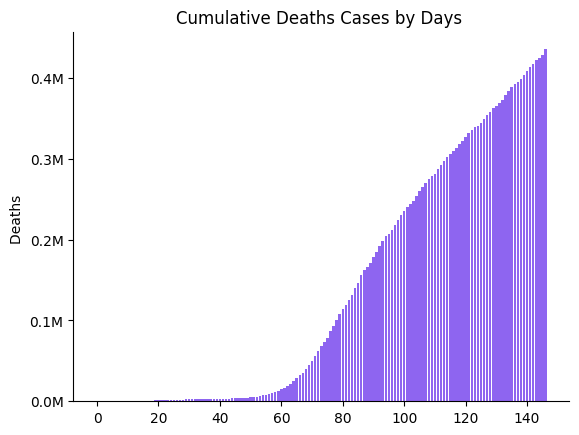

In [5]:
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'{x * 1e-6:1.1f}M'
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.bar(np.arange(len(df1GroupByDate['date'])), df1GroupByDate['deaths'],color='#8E65F0')
ax.set_ylabel('Deaths ')
ax.set_title('Cumulative Deaths Cases by Days ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


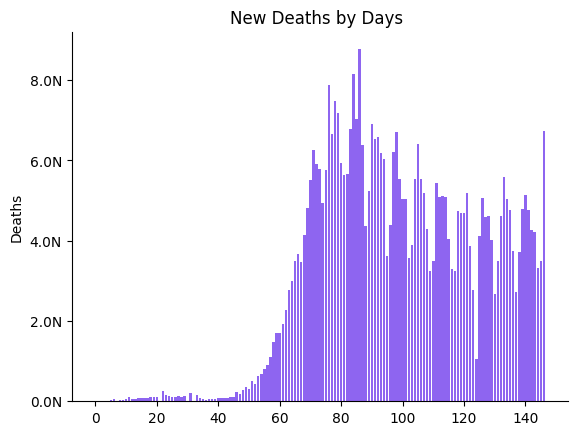

In [6]:
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'{x * 1e-3:1.1f}N'
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.bar(np.arange(len(df1GroupByDate['date'])), df1GroupByDate['new death'],color='#8E65F0')
ax.set_ylabel('Deaths')
ax.set_title('New Deaths by Days ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

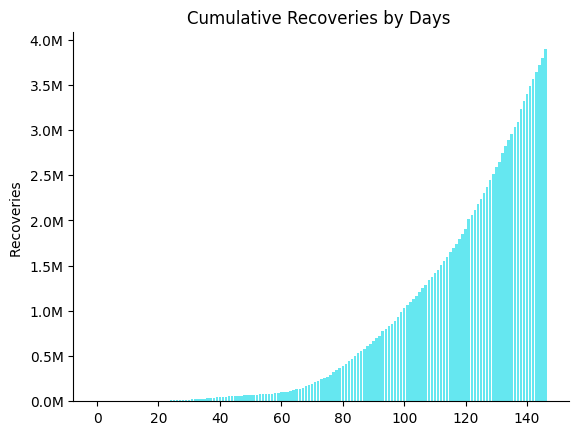

In [7]:
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'{x * 1e-6:1.1f}M'
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.bar(np.arange(len(df1GroupByDate['date'])), df1GroupByDate['recoveries'],color='#65E7F0')
ax.set_ylabel('Recoveries ')
ax.set_title('Cumulative Recoveries by Days ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


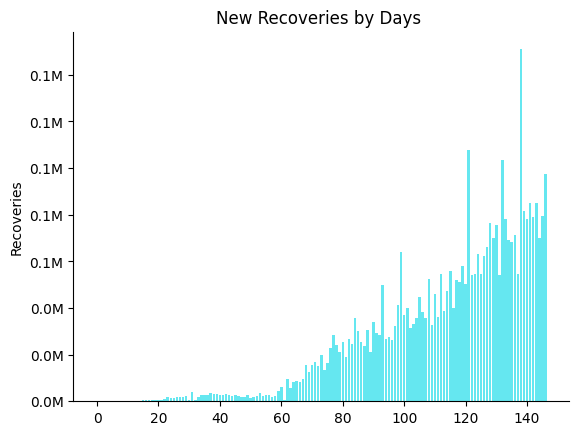

In [8]:
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'{x * 1e-6:1.1f}M'
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.bar(np.arange(len(df1GroupByDate['date'])), df1GroupByDate['new recoveries'],color='#65E7F0')
ax.set_ylabel('Recoveries')
ax.set_title('New Recoveries by Days ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

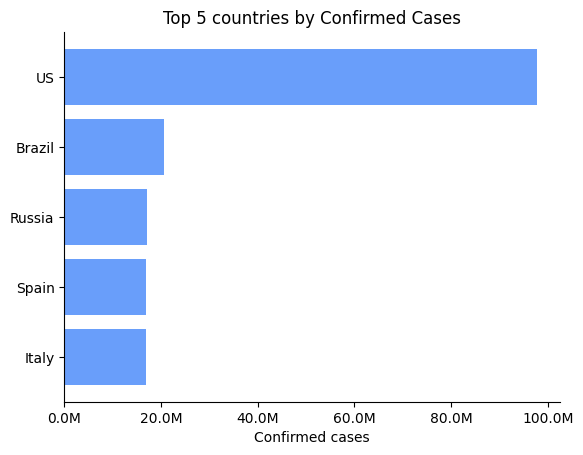

In [9]:
Top5_countries_df =copy_df1.groupby('Country/Region').agg({'confirmed': np.sum,'deaths': np.sum , 'recoveries': np.sum}).sort_values('confirmed', ascending=False)
List5= Top5_countries_df.index.tolist()
Top5_countries_df.reset_index(inplace=True,drop= False)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
Country = List5[0:5]
y_pos = np.arange(len(Country))
cases = Top5_countries_df.loc[0:4,'confirmed'].tolist()
ax.barh(y_pos, cases, align='center',
        color='#699EFA', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(Country)
ax.invert_yaxis()  
ax.set_xlabel('Confirmed cases')
ax.set_title('Top 5 countries by Confirmed Cases')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

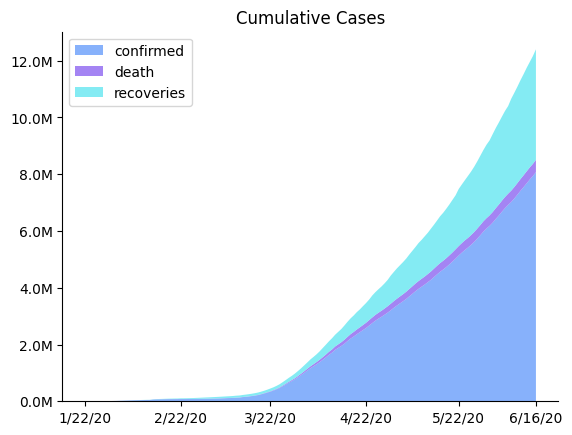

In [10]:

color_map= ['#699EFA','#8E65F0','#65E7F0']
date1 = ['1st Jan', '1st Feb', '1st Mar', '1st Apr', '1st May', '1st Jun']
date= df1GroupByDate['date'].tolist()
StatByDay = {'confirmed':[],'death':[],'recoveries':[] }
for i in range(len(date)):
    StatByDay['confirmed'].append(df1GroupByDate.loc[i,'confirmed'])
    StatByDay['death'].append(df1GroupByDate.loc[i,'deaths'])
    StatByDay['recoveries'].append(df1GroupByDate.loc[i,'recoveries'])
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.stackplot(date, StatByDay.values(),
             labels=StatByDay.keys(), alpha=0.8,colors = color_map)
ax.legend(loc='upper left')
ax.set_title('Cumulative Cases')
ax.set_xticks([0,31,60,91,121,146])
# ax.set_xticks(date1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [11]:
df2=df2.fillna(0)
df2.replace('N.A.', '0', inplace= True)
df2_obj = df2.select_dtypes(['object'])
df2[df2_obj.columns] = df2_obj.apply(lambda x: x.str.strip('%'))
convert_dict = {'Yearly Change': float,
                'Fert. Rate': float,
                'Med. Age': float,
                'Urban Pop %': float,
                'World Share': float}
df2 = df2.astype(convert_dict)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           235 non-null    float64
 7   Fert. Rate               235 non-null    float64
 8   Med. Age                 235 non-null    float64
 9   Urban Pop %              235 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 20.3+ KB


In [12]:
df2

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,India,1377233523,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,United States,330610570,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,272931713,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,219992900,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06,3,50,100,0.0,0.0,0.0,10.0,0.00
231,Falkland Islands,3458,3.05,103,0,12170,0.0,0.0,0.0,66.0,0.00
232,Niue,1624,0.68,11,6,260,0.0,0.0,0.0,46.0,0.00
233,Tokelau,1354,1.27,17,136,10,0.0,0.0,0.0,0.0,0.00
